# Install Dependencies

In [25]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd

In [26]:
df = pd.read_csv('youtoxic_english_1000.csv')

In [27]:
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
df.tail()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
995,Ugi5ADt10EdDz3gCoAEC,XRuCW80L9mA,I remember that they sent in the national defe...,False,False,False,False,False,False,False,False,False,False,False,False
996,Ugifh2DMhBbDkHgCoAEC,XRuCW80L9mA,Stats don`t represent the problem. Race baitin...,True,False,False,False,False,True,True,False,False,False,False,False
997,Ugj_plbGBjjzYXgCoAEC,XRuCW80L9mA,The quote from the mother... Wow that hit hard...,False,False,False,False,False,False,False,False,False,False,False,False
998,Ugj0bah1De8xy3gCoAEC,XRuCW80L9mA,this video is so racist,False,False,False,False,False,False,False,False,False,False,False,False
999,UgjBJKQSoQMQ6ngCoAEC,XRuCW80L9mA,"God, the narrator has such an annoying lisp.",False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
df.iloc[0]['Text']

"If only people would just take a step back and not make this case about them, because it wasn't about anyone except the two people in that situation.\xa0 To lump yourself into this mess and take matters into your own hands makes these kinds of protests selfish and without rational thought and investigation.\xa0 The guy in this video is heavily emotional and hyped up and wants to be heard, and when he gets heard he just presses more and more.\xa0 He was never out to have a reasonable discussion.\xa0 Kudos to the Smerconish for keeping level the whole time and letting Masri make himself out to be a fool.\xa0 How dare he and those that tore that city down in protest make this about themselves and to dishonor the entire incident with their own hate.\xa0 By the way, since when did police brutality become an epidemic?\xa0 I wish everyone would just stop pretending like they were there and they knew EXACTLY what was going on, because there's no measurable amount of people that honestly witne

In [30]:
df[df.columns[3:]]

,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,False,False,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False
996,True,False,False,False,False,True,True,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False


# Preprocess

In [31]:
from tensorflow.keras.layers import TextVectorization

In [32]:
df.columns

Index(['CommentId', 'VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat',
       'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist',
       'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate',
       'IsRadicalism'],
      dtype='object')

In [33]:
df[['IsToxic', 'IsAbusive', 'IsThreat',
       'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist',
       'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate',
       'IsRadicalism']] = df[['IsToxic', 'IsAbusive', 'IsThreat',
       'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist',
       'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate',
       'IsRadicalism']].astype(int)

In [34]:
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,0,0,0,0,0,0,0,0,0,0,0,0
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,1,1,0,0,0,0,0,0,0,0,0,0
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,1,1,0,0,1,0,0,0,0,0,0,0
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,0,0,0,0,0,0,0,0,0,0,0,0
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
x = df['Text']
y = df[df.columns[3:]].values # to convert them into numpy arrays


In [36]:
x

0      If only people would just take a step back and...
1      Law enforcement is not trained to shoot to app...
2      \nDont you reckon them 'black lives matter' ba...
3      There are a very large number of people who do...
4      The Arab dude is absolutely right, he should h...
                             ...                        
995    I remember that they sent in the national defe...
996    Stats don`t represent the problem. Race baitin...
997    The quote from the mother... Wow that hit hard...
998                              this video is so racist
999        God, the narrator has such an annoying lisp. 
Name: Text, Length: 1000, dtype: object

In [37]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [38]:
MAX_FEATURES = 10000 # no of words in a vocab

In [39]:
vectorizer = TextVectorization(max_tokens = MAX_FEATURES,
                               output_sequence_length = 100,
                               output_mode = 'int') #eg ['i love pizza'] to [42,100,110]

In [40]:
vectorizer.adapt(x.values) #learn the numpy arrays of the text

In [41]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'and',
 'a',
 'of',
 'is',
 'that',
 'you',
 'in',
 'i',
 'this',
 'are',
 'it',
 'was',
 'they',
 'for',
 'people',
 'black',
 'not',
 'he',
 'have',
 'on',
 'be',
 'all',
 'if',
 'with',
 'police',
 'but',
 'what',
 'like',
 'just',
 'get',
 'his',
 'do',
 'white',
 'as',
 'so',
 'your',
 'no',
 'by',
 'about',
 'would',
 'there',
 'or',
 'at',
 'we',
 'them',
 'up',
 'who',
 'out',
 'their',
 'its',
 'brown',
 'dont',
 'an',
 'will',
 'when',
 'officer',
 'shot',
 'should',
 'because',
 'more',
 'from',
 'cop',
 'why',
 'how',
 'one',
 'these',
 'can',
 'my',
 'did',
 'video',
 'then',
 'him',
 'has',
 'some',
 'know',
 'me',
 'man',
 'being',
 'only',
 'cops',
 'over',
 'guy',
 'were',
 'had',
 '\xa0',
 'racist',
 'go',
 'fuck',
 'blacks',
 'time',
 'right',
 'need',
 'say',
 'race',
 'those',
 'down',
 'shit',
 'think',
 'off',
 'im',
 'been',
 'back',
 'see',
 'most',
 'make',
 'going',
 'even',
 'than',
 'here',
 'good',
 'still',
 'other',
 'nothi

In [42]:
vectorized_text = vectorizer(x.values)
vectorized_text

<tf.Tensor: shape=(1000, 100), dtype=int64, numpy=
array([[  26,   82,   18, ...,  324,   93,    4],
       [ 169,  447,    7, ...,    0,    0,    0],
       [  55,    9, 2944, ...,    0,    0,    0],
       ...,
       [   2, 1158,   64, ...,    0,    0,    0],
       [  12,   73,    7, ...,    0,    0,    0],
       [ 229,    2, 3333, ...,    0,    0,    0]])>

In [43]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(1000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [44]:
batch_x, batch_y = dataset.as_numpy_iterator().next()

In [45]:
# 70% for training, 20% for validaion, 10% for testing
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [46]:
train_generator = train.as_numpy_iterator()

# Create a Sequential Model

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Embedding, Dense

In [48]:
# Build the model
model = Sequential()
# Embedding layer
model.add(Embedding(MAX_FEATURES+1, 32))
model.add(Bidirectional(LSTM(32, activation='tanh')))#double the output shape (bidirectional)
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(12, activation='sigmoid'))

In [49]:
model.compile(loss='binary_crossentropy', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320032    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 12)                1548      
                                                        

In [50]:
history = model.fit(train, epochs = 10, validation_data = val)

Epoch 1/10
44/44 [==============================] - 9s 88ms/step - loss: 0.4250 - val_loss: 0.2659
Epoch 2/10
44/44 [==============================] - 3s 71ms/step - loss: 0.2608 - val_loss: 0.2674
Epoch 3/10
44/44 [==============================] - 4s 88ms/step - loss: 0.2602 - val_loss: 0.2598
Epoch 4/10
44/44 [==============================] - 3s 69ms/step - loss: 0.2437 - val_loss: 0.2152
Epoch 5/10
44/44 [==============================] - 4s 85ms/step - loss: 0.2090 - val_loss: 0.1988
Epoch 6/10
44/44 [==============================] - 6s 144ms/step - loss: 0.1708 - val_loss: 0.1689
Epoch 7/10
44/44 [==============================] - 4s 98ms/step - loss: 0.1370 - val_loss: 0.1273
Epoch 8/10
44/44 [==============================] - 3s 72ms/step - loss: 0.1186 - val_loss: 0.1148
Epoch 9/10
44/44 [==============================] - 5s 109ms/step - loss: 0.1072 - val_loss: 0.1085
Epoch 10/10
44/44 [==============================] - 3s 70ms/step - loss: 0.0935 - val_loss: 0.0902


In [51]:
from matplotlib import pyplot as plt

In [52]:
history.history

{'loss': [0.4249570965766907,
  0.26077648997306824,
  0.2602096498012543,
  0.2436758428812027,
  0.20901493728160858,
  0.17076174914836884,
  0.13703402876853943,
  0.11856608837842941,
  0.10717479884624481,
  0.09349554032087326],
 'val_loss': [0.26594480872154236,
  0.2674097716808319,
  0.25984707474708557,
  0.21524518728256226,
  0.1987970918416977,
  0.16887949407100677,
  0.12731750309467316,
  0.11479512602090836,
  0.10853574424982071,
  0.09023576229810715]}

<Figure size 800x500 with 0 Axes>

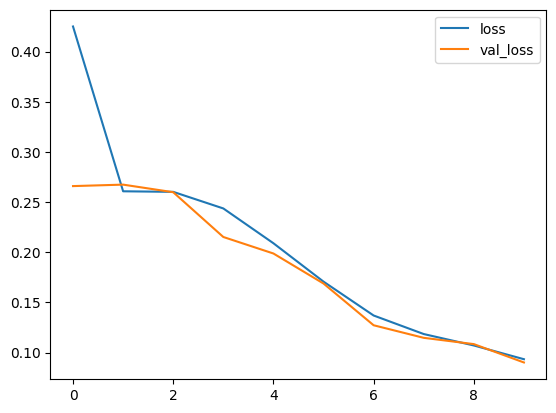

In [53]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# Predictions

In [54]:
input_text = vectorizer('You freaking suck!')

In [55]:
df.columns[3:]

Index(['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene',
       'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic',
       'IsReligiousHate', 'IsRadicalism'],
      dtype='object')

In [56]:
batch = test.as_numpy_iterator().next()

In [57]:
batch_x, batch_y = test.as_numpy_iterator().next()

In [58]:
(model.predict(batch_x) >0.5).astype(int) # converts value greater than 0.5 to 1 and less than to 0(binary format)

1/1 [==============================] - 1s 877ms/step


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]])

In [147]:
res = model.predict(batch_x)

1/1 [==============================] - 0s 31ms/step


In [148]:
res

array([[5.87703777e-04, 1.03880826e-03, 2.44303628e-05, 9.14399687e-04,
        7.07682164e-04, 5.00801571e-06, 7.82480697e-07, 9.80341429e-06,
        1.31093756e-11, 1.75928883e-10, 2.65134677e-05, 2.54288501e-09],
       [9.89216149e-01, 4.11999941e-01, 6.16494305e-02, 1.88981548e-01,
        1.75865293e-01, 8.57707262e-01, 7.00421810e-01, 6.44615740e-02,
        1.86830573e-03, 6.98230055e-04, 9.93587300e-02, 9.55848023e-04],
       [1.96471101e-05, 3.55458105e-05, 1.04830860e-06, 8.21727444e-05,
        9.01846142e-05, 2.69670636e-07, 2.33721185e-08, 7.74959972e-07,
        2.65305119e-14, 8.82813083e-13, 3.60571585e-06, 4.22768417e-11],
       [9.62153435e-01, 9.33242738e-01, 3.59236337e-02, 3.38580102e-01,
        1.37316018e-01, 1.44421710e-02, 6.03197841e-03, 3.74285574e-03,
        1.59687370e-05, 1.27328840e-05, 2.67284317e-03, 8.96830261e-06],
       [1.76747236e-03, 2.82148831e-03, 1.03059851e-04, 2.50333245e-03,
        1.91575428e-03, 2.61610894e-05, 5.31733895e-06, 4.62

# Evaluate the model

In [61]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [62]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [63]:
for batch in test.as_numpy_iterator():
  x_true, y_true = batch
  yhat = model.predict(x_true)
  y_true = y_true.flatten()
  yhat = yhat.flatten()

  pre.update_state(y_true, yhat)
  re.update_state(y_true, yhat)
  acc.update_state(y_true, yhat)


1/1 [==============================] - 0s 32ms/step


In [64]:
print(f"Precision: {pre.result().numpy()},Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}")

Precision: 0.95652174949646,Recall: 0.6470588445663452, Accuracy: 0.0


# Test and Gradio

In [68]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.1 MB/s

In [70]:
import gradio as gr

In [71]:
model.save('toxicity.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [72]:
model = tf.keras.models.load_model('toxicity.h5')

In [73]:
input_str = vectorizer("hey i freaking hate you")

In [74]:
res = model.predict(np.expand_dims(input_str, 0))

1/1 [==============================] - 2s 2s/step


In [75]:
df.columns[3:]

Index(['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene',
       'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic',
       'IsReligiousHate', 'IsRadicalism'],
      dtype='object')

In [95]:
res

array([[9.38779294e-01, 9.05677021e-01, 2.94155963e-02, 2.94570863e-01,
        1.17345996e-01, 1.11089414e-02, 4.50614234e-03, 3.28516029e-03,
        1.12770049e-05, 1.03723505e-05, 2.42835982e-03, 8.18708031e-06]],
      dtype=float32)

In [142]:
def score_comment(comment):
    vectorized_comment = vectorizer(comment)
    results = model.predict(np.expand_dims(vectorized_comment, 0))

    text = ''
    for idx, col in enumerate(df.columns[3:]):
        text += '{}: {},\n'.format(col, results[0][idx] > 0.5)

    return text

In [143]:
interface = gr.Interface(
    fn=score_comment,
    inputs="text",
    outputs="label",
    title="Toxicity Detection",
    description="Enter a piece of text to check if it's toxic or not."
)

In [144]:

interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://369c1f4dc519242ec9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
